# Poisson Processes

Problem Set:  In the lecture, we have discussed how to generate homogeneous Poisson process via inter-arrival times (method 1). We also mentioned that there is an alternative way to generate Poisson process by first generating the total number of arrivals and then distributing each arrival uniformly on the time interval (method 2).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

## (i)

Implement method 1 and generate a Poisson process with rate 5 on time interval [0, 2]. Verifying your implementation by showing that the simulated total number of arrivals follows a Poisson distribution with mean 5.

Steps for Method 1:

- Genertae the first inter-arrival time from $exp( \frac{1}{5} )$
- Continue generating subsequent inter-arrival time until cumulative time exceeds the upper bound of 2
- Verify the total arrivals to see if it follows a Poisson Distribution with mean = $\lambda$ * interval = 10

Time value of arrivals: [0.10383347768954443, 0.11222053947979918, 0.1704617507393817, 0.2001427128340586, 1.478992633038942, 1.8042414914070801, 1.9106465180139582, 1.9284689897426897]
Total number of arrivals: 8



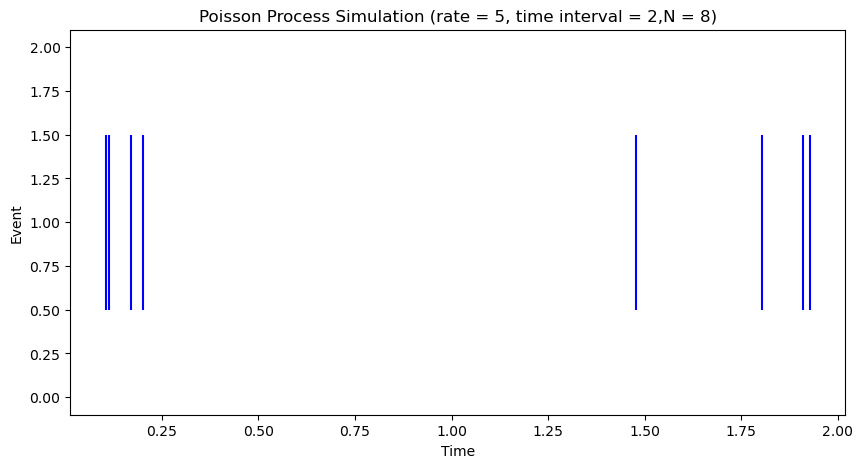

In [16]:
# Method 1: Simulate a Poisson process via inter-arrival times
def generate_poisson_process_method1(rate, time_interval):
    arrivals = []
    current_time = 0
    while current_time < time_interval:
        inter_arrival_time = np.random.exponential(1 / rate)  # Exponentially distributed inter-arrival time
        current_time += inter_arrival_time
        if current_time < time_interval:
            arrivals.append(current_time)
    return arrivals

# Parameters
rate = 5  # Rate of the Poisson process (arrivals per unit time)
time_interval = 2  # Time interval [0, 2]

# Generate the Poisson process
arrivals = generate_poisson_process_method1(rate, time_interval)
#print(arrivals)
num_arrivals = len(arrivals)
print(f"Time value of arrivals: {arrivals}")
print(f"Total number of arrivals: {num_arrivals}")
print()

# Plot the Poisson process
plt.figure(figsize=[10, 5])
plt.eventplot(arrivals,colors='b')
plt.title(f"Poisson Process Simulation (rate = {rate}, time interval = {time_interval},N = {len(arrivals)})")
plt.xlabel("Time")
plt.ylabel("Event")
plt.show()




Above is the visualization of the occurrence of discrete events over continuous time. Each vertical line represents an event that occurs at a specific point on the x-axis. The value on y-axis does not represent anything. Multiple events can occur at the same time, and these will be stacked on top of each other.

#### Verify using 1000 samples

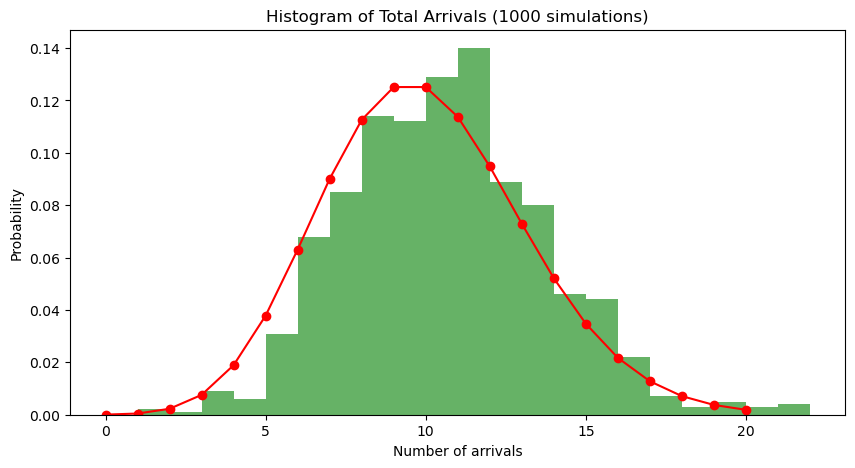

In [ ]:
# We simulate this process multiple times and check if the number of arrivals follows Poisson distribution
num_simulations = 1000
arrival_counts = [len(generate_poisson_process_method1(rate, time_interval)) for _ in range(num_simulations)]
x_values = np.arange(0, 21)
pmf_values = poisson.pmf(x_values,10)
# Plot histogram of the total number of arrivals across simulations
plt.figure(figsize=[10, 5])
plt.hist(arrival_counts, bins=range(min(arrival_counts), max(arrival_counts) + 1), density=True, alpha=0.6, color='g')
#plt.stem(x_values, pmf_values, basefmt=" ")
plt.plot(x_values, pmf_values, 'r-', marker='o', label=f"Poisson(mean= 10) PMF")
plt.title("Histogram of Total Arrivals (1000 simulations)")
plt.xlabel("Number of arrivals")
plt.ylabel("Probability")
plt.show()

#### Verifying using 10000 samples

Total number of arrivals: 10


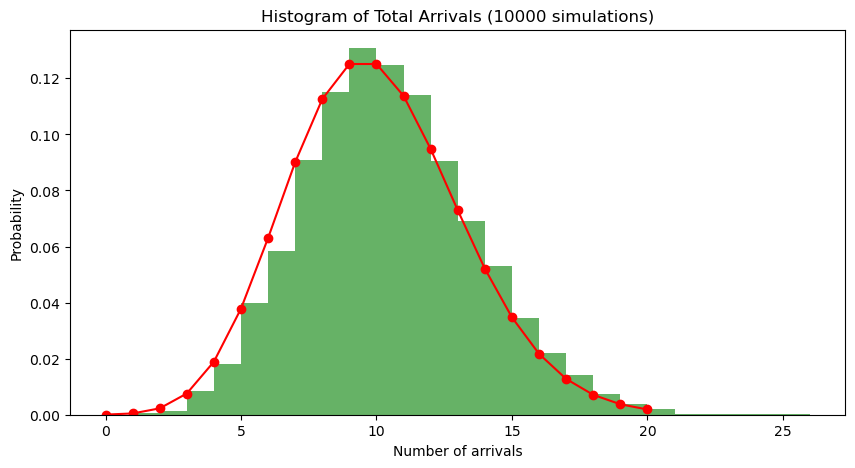

In [26]:
# Verify the total number of arrivals follows a Poisson distribution
num_arrivals = len(arrivals)
print(f"Total number of arrivals: {num_arrivals}")

# We simulate this process multiple times and check if the number of arrivals follows Poisson distribution
num_simulations = 10000
arrival_counts = [len(generate_poisson_process_method1(rate, time_interval)) for _ in range(num_simulations)]
x_values = np.arange(0, 21)
pmf_values = poisson.pmf(x_values,10)
# Plot histogram of the total number of arrivals across simulations
plt.figure(figsize=[10, 5])
plt.hist(arrival_counts, bins=range(min(arrival_counts), max(arrival_counts) + 1), density=True, alpha=0.6, color='g')
#plt.stem(x_values, pmf_values, basefmt=" ")
plt.plot(x_values, pmf_values, 'r-', marker='o', label=f"Poisson(mean= 10) PMF")
plt.title("Histogram of Total Arrivals (10000 simulations)")
plt.xlabel("Number of arrivals")
plt.ylabel("Probability")
plt.show()

As the simulation times increase, the approximation using inter-arrivals would be more accurate. 

## (ii)

Implement method 2 and generate a Poisson process with rate 5 on time interval [0, 2]. Verifying your implementation by showing that the simulated inter-arrivals follow exponential distributions with rate 5.

Method2:

- Sample total arrival times ~ Poisson(rate * T) 
- Generate N uniform(0, T) random times
- Sort these times to get the ordered arrival times

Generated 10 arrivals:
[0.04245894 0.17607926 0.30916902 0.50661871 0.57715363 0.78604423
 0.95958707 1.1326027  1.50449729 1.60853752]


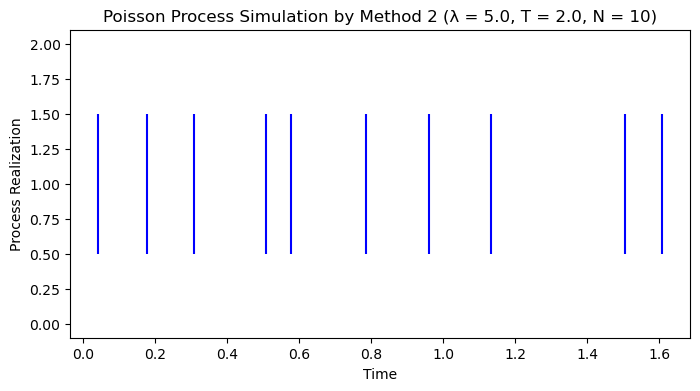

In [20]:
def generate_poisson_process_method2(rate, T):

    # Step 1: Generate the total number of arrivals from a Poisson distribution
    # The parameter for the Poisson distribution is λT
    num_times = np.random.poisson(lam= rate * T)
    
    # Step 2: Generate N arrival times uniformly distributed on [0, T]
    arrival_times = np.random.uniform(low=0.0, high=T, size=num_times)
    
    # Step 3: Sort the arrival times in ascending order
    arrival_times.sort()
    
    return arrival_times

if __name__ == "__main__":
    lam = 5.0  
    T = 2.0    
    
    # Generate Poisson process
    arrivals = generate_poisson_process_method2(lam, T)
    
    # Print the arrival times
    print(f"Generated {len(arrivals)} arrivals:")
    print(arrivals)
    
    # Plot the arrival times using an event plot
    plt.figure(figsize=(8, 4))
    plt.eventplot(arrivals, colors='b')
    plt.title(f"Poisson Process Simulation by Method 2 (λ = {lam}, T = {T}, N = {len(arrivals)})")
    plt.xlabel("Time")
    plt.ylabel("Process Realization")
    plt.show()


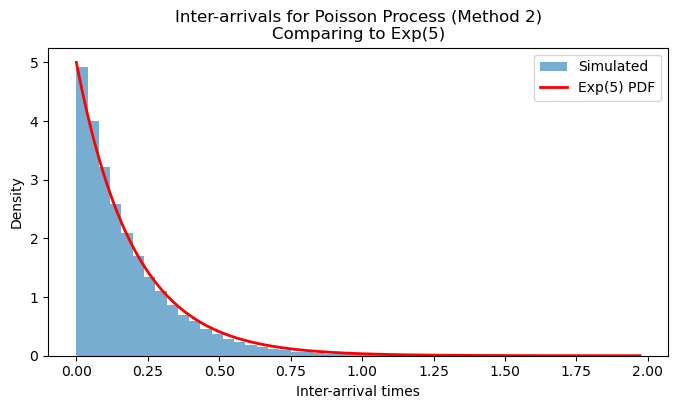

In [ ]:
all_interarrivals = []
n_simulations = 10000
lam = 5
T = 2

for _ in range(n_simulations):
    arrivals = generate_poisson_process_method2(lam, T)
        
    # If there is at least one arrival, compute the time from 0 to the first arrival
    # and then the gaps between subsequent arrivals.
    if len(arrivals) > 0:
        # prepend 0.0 to compute the time to first arrival
        extended_arrivals = np.concatenate(([0.0], arrivals))
        inter_arrivals = np.diff(extended_arrivals)
        all_interarrivals.extend(inter_arrivals)

# Convert to NumPy array for easier manipulation
all_interarrivals = np.array(all_interarrivals)

plt.figure(figsize=(8,4))

n_bins = 50  
counts, bin_edges, _ = plt.hist(all_interarrivals, bins=n_bins, density=True, alpha=0.6, label="Simulated")
    
# Overlay the theoretical exponential PDF with rate lam
x_vals = np.linspace(0, max(all_interarrivals), 200)
exp_pdf = lam * np.exp(-lam * x_vals)
plt.plot(x_vals, exp_pdf, 'r-', lw=2, label=f"Exp({lam}) PDF")
    
plt.title(f"Inter-arrivals for Poisson Process (Method 2)\nComparing to Exp({lam})")
plt.xlabel("Inter-arrival times")
plt.ylabel("Density")
plt.legend()
plt.show()

## (iii)

Problem Set: Do you think if method 2 can be extended to non-homogeneous Poisson process? If yes, please write down the pseudo code. If no, please explain your reason.

The latex format pseudo code is written in the report file.

STEP1: Compute $\Lambda(T) = \int_0^T \lambda(s)\, ds$ in [0,T]

STEP2: Generate N following $Poisson( \Lambda(T))$.

STEP3: For i in 1,...,N:
  - Generate $U_i$ \~{$Uniform(0, 1)$} .
  - Compute arrival time $T_i = \Lambda^{-1}(U \cdot\Lambda(T))$


STEP4: Sort the arrival times  in ascending order.

return:
  The sorted set of arrival times $T_1, T_2, ..., T_N$